# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Dương Trung Nghĩa
- MSSV: 22127293
- Lớp: 22CLC05

## Import các thư viện liên quan

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Helper functions

In [9]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HER
    return np.array(Image.open(img_path))

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    plt.imshow(img_2d)
    plt.axis('off')
    plt.show()
    
def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
   
    # YOUR CODE HERE
    if img_path.endswith("png") or img_path.endswith("pdf"):
        image = Image.fromarray(img_2d)
        image.save(img_path,format = (img_path[-3:]).upper())
        image.show()
    else:
        print("Sorry, can only save with choice 'png' or 'pdf'.")
   
    

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    height,width,channels = img_2d.shape
    return img_2d.reshape(height*width,-1)


def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    # YOUR CODE HERE    
    labels = np.zeros(len(img_1d), dtype=int)
    if init_centroids == 'random':
        centroids = np.random.randint(low=0, high=255, size=(k_clusters, 3)).astype(float)
        while len(np.unique(centroids, axis=0)) != k_clusters:
            centroids = np.random.randint(low=0, high=255, size=(k_clusters, 3)).astype(float)
    elif init_centroids == 'in_pixels':
        unique_colors = np.unique(img_1d, axis=0)
        num_colors = unique_colors.shape[0]
        k_clusters = min(k_clusters, num_colors)
        indices = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
        centroids = img_1d[indices].astype(float)
        while len(np.unique(centroids, axis=0)) != k_clusters:
            indices = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
            centroids = img_1d[indices].astype(float)
    else:
        print("Sorry, init_centroids parameter just be 'random' or 'in_pixels'.")

    while (max_iter > 0):
        distances = np.linalg.norm(img_1d[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = []
        for i in range(k_clusters):
            points = img_1d[labels == i]
            if len(points) == 0:
                new_centroid = img_1d[np.random.choice(img_1d.shape[0])]
            else:
                new_centroid = points.mean(axis=0)
            new_centroids.append(new_centroid)
        
        new_centroids = np.array(new_centroids)                    
        
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
        max_iter -= 1

    return centroids, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    height, width, channels = img_2d_shape
    img_1d = centroids[labels].astype('uint8')
    img_2d = img_1d.reshape(height, width, channels)
    return img_2d

# Your additional functions here


## Your tests

![Inside Out 2](https://m.media-amazon.com/images/M/MV5BYTc1MDQ3NjAtOWEzMi00YzE1LWI2OWUtNjQ0OWJkMzI3MDhmXkEyXkFqcGdeQXVyMDM2NDM2MQ@@._V1_.jpg)


## Main FUNCTION

In [13]:
def main():
    img_path = input("Input image's path: ")
    img_2d = read_img(rf"{img_path}")
    img_1d = convert_img_to_1d(img_2d)
    k_clusters_list = [3, 5 ,7]
    max_iter = 1000
    init_centroids_list = ['random', 'in_pixels']
    
    for init_centroids in init_centroids_list:
        for k_clusters in k_clusters_list:
            print(f"Processing with {k_clusters} clusters and {init_centroids} initialization.")
            centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)
            new_img_2d = generate_2d_img(img_2d.shape, centroids, labels)
            show_img(new_img_2d)
            choice = input("Choose png or pdf: ").lower()    
            save_img(new_img_2d, f"{k_clusters}_{init_centroids}.{choice}")
            
           

Input image's path:  C:\Users\TRUNG NGHIA\Downloads\Inside_Out_2_poster.jpg


Processing with 3 clusters and random initialization.


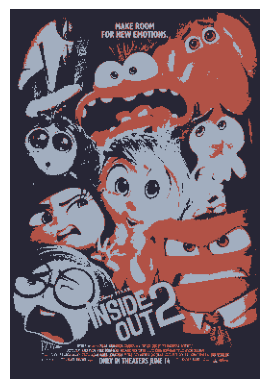

Choose png or pdf:  pdf


Processing with 5 clusters and random initialization.


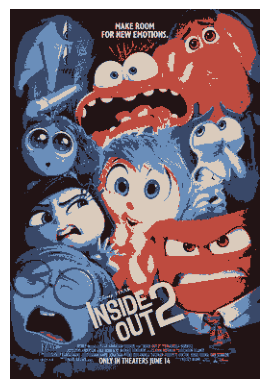

Choose png or pdf:  pdf


Processing with 7 clusters and random initialization.


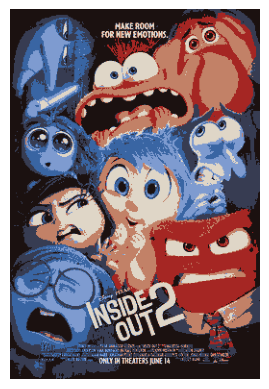

Choose png or pdf:  pdf


Processing with 3 clusters and in_pixels initialization.


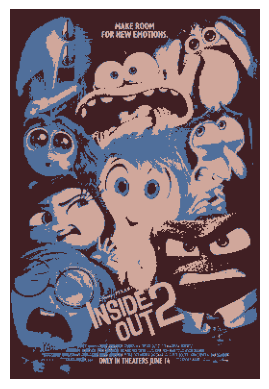

Choose png or pdf:  pdf


Processing with 5 clusters and in_pixels initialization.


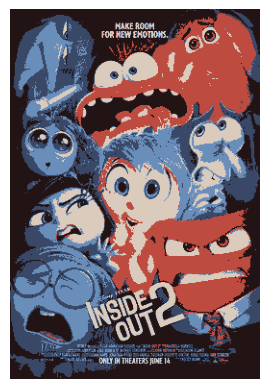

Choose png or pdf:  pdf


Processing with 7 clusters and in_pixels initialization.


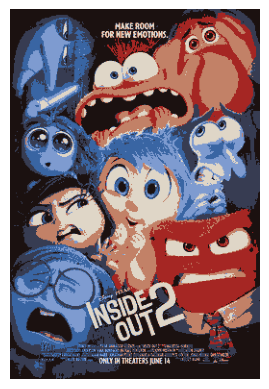

Choose png or pdf:  pdf


In [14]:
# Call main function
main()